# Plotting datetime in matplotlib

In [3]:
# initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Figure with datetime axis

Very often we'll want to plot data for which the horizontal axis corresponds to datetime. Luckily, matplotlib recognizes pandas datetime format and can plot the datetime axis correctly. Let's again take the CalSOFI data as an example:

In [44]:
# loading the CalSOFI data
CalSOFI = pd.read_csv("data/CalSOFI_subset.csv", parse_dates = ["Datetime"])
display(CalSOFI)

,Cast_Count,Station_ID,Datetime,Depth_m,T_degC,Salinity,SigmaTheta
0,14172,060.0 060.0,1965-01-11 04:43:00,0,12.12,33.030,25.030
1,14172,060.0 060.0,1965-01-11 04:43:00,10,12.08,33.040,25.050
2,14172,060.0 060.0,1965-01-11 04:43:00,20,12.06,33.040,25.050
3,14172,060.0 060.0,1965-01-11 04:43:00,30,12.06,33.040,25.050
4,14172,060.0 060.0,1965-01-11 04:43:00,50,11.18,33.280,25.400
...,...,...,...,...,...,...,...
81369,25948,090.5 043.0,1988-09-22 18:45:00,250,7.82,34.168,26.651
81370,25948,090.5 043.0,1988-09-22 18:45:00,275,7.66,34.203,26.701
81371,25948,090.5 043.0,1988-09-22 18:45:00,300,7.44,34.225,26.750
81372,25948,090.5 043.0,1988-09-22 18:45:00,350,7.17,34.260,26.817


Let's say we're interested in data taken at 10 m deep:

In [101]:
CalSOFI_10 = CalSOFI.loc[CalSOFI["Depth_m"] == 10]

We can plot the water temperature as function of dates as follows:

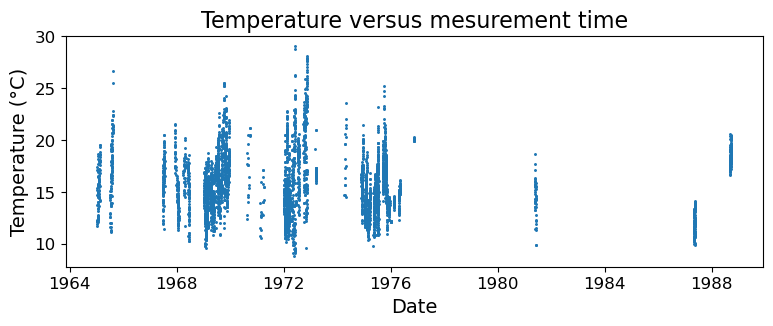

In [81]:
# date spans decades, so pick a "long" x-axis
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

# Note the use of .value to extract the underlying data when plotting
ax.scatter(CalSOFI_10["Datetime"].values, CalSOFI_10["T_degC"].values, s=5, marker=".", )

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Temperature versus mesurement time", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

Now let's suppose we want to focus on the year 1975. First we subset the data:

In [99]:
CalSOFI_10_1975 = CalSOFI_10.loc[
    (CalSOFI_10["Datetime"] >= pd.to_datetime("1975-01-01")) &
    (CalSOFI_10["Datetime"] < pd.to_datetime("1976-01-01"))
]

Now we plot the subsetted data. Notice where and how matplotlib places the ticks on the x- (temporal) axis:

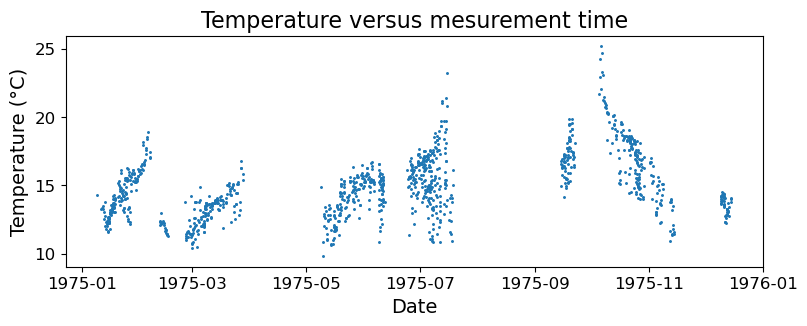

In [102]:
# date spans decades, so pick a "long" x-axis
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

# Note the use of .value to extract the underlying data when plotting
ax.scatter(CalSOFI_10_1975["Datetime"].values, CalSOFI_10_1975["T_degC"].values, s=5, marker=".", )

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Temperature versus mesurement time", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

(*Note*: We don't have have a strong seasonal pattern because of the confounding factor of stations. Different stations are sampled at different times, which creates an apparent pattern that has nothing to do with true seasonal effect)

## Setting ticks and tick labels on datetime axis

While we can just plot the dates as-is, sometimes we want better control of where the ticks and placed and how they are formatted. Such functionalities are provided by the `matplotlib.dates` submodule, which we import below:

In [103]:
import matplotlib.dates as mdates

The documentations of the submodule is found here: [https://matplotlib.org/stable/api/dates_api.html](https://matplotlib.org/stable/api/dates_api.html)

Instead of using `ax.set_xticks()` and `ax.set_yticks()` to set the ticks and labels, we use the `ax.xaxis.set_major_locator()` to specify the location of ticks and `ax.xasis.set_major_formatter()` to specify the format of ticks. It is easier to see an example, so here it is:

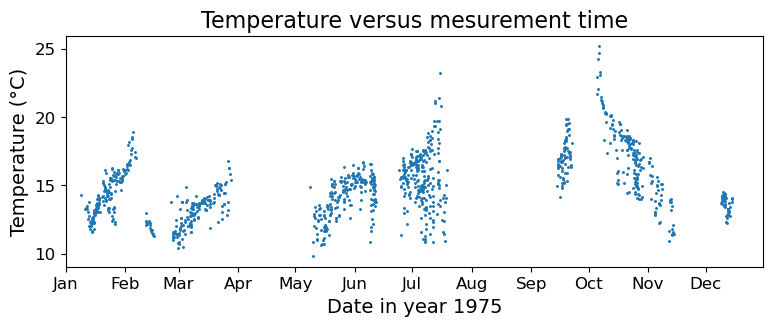

In [104]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

ax.scatter(CalSOFI_10_1975["Datetime"].values, CalSOFI_10_1975["T_degC"].values, s=5, marker=".", )

ax.set_xlim(pd.to_datetime("1975-01-01"), pd.to_datetime("1975-12-31"))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.set_xlabel("Date in year 1975", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Temperature versus mesurement time", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

We use `mdates.MonthLocator()` to tell matplotlib that we want one tick every month. And we use `mdates.DateFormatter("%b")` to tell matplotlib that each tick label should display the short name of the month, and nothing else.

`matplotlib.mdates` has a few more locators available in addition to `MonthLocator()`. For example:

+ `DayLocator()`: ticks placed on day-level intervals
+ `MonthLocator()`: ticks placed on month-level intervals
+ `YearLocator()`: ticks placed on year-level intervals
+ `HourLocator()`: ticks placed on hour-level intervals
+ `MinuteLocator()`: ticks placed on minute-level intervals

Note that these locators have optional arguments. For example, to display a tick every 15th of the month, we can do:

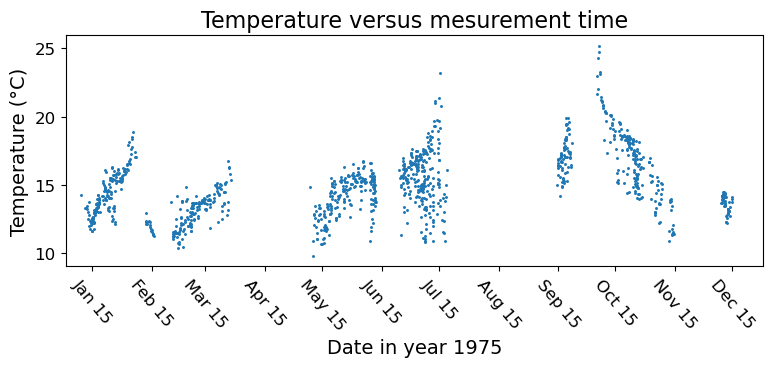

In [105]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

ax.scatter(CalSOFI_10_1975["Datetime"].values, CalSOFI_10_1975["T_degC"].values, s=5, marker=".", )

ax.set_xlim(pd.to_datetime("1975-01-01"), pd.to_datetime("1975-12-31"))
ax.xaxis.set_major_locator(mdates.DayLocator([15]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.tick_params("x", labelrotation=-50)

ax.set_xlabel("Date in year 1975", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Temperature versus mesurement time", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

Note also that we handled long tick labels by rotating them, which is achieved using the `ax.tick_params("x", labelrotation=-50)` line